In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
ds=pd.read_csv('/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv')

In [6]:
ds.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [7]:
ds.shape

(1000, 9)

In [8]:
ds.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [9]:
ds.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [10]:
ds.isnull().sum()#there is not null value

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [11]:
ds.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [12]:
ds.groupby('Product Category').Quantity.count()

Product Category
Beauty         307
Clothing       351
Electronics    342
Name: Quantity, dtype: int64

In [13]:
ds.groupby('Product Category').Quantity.sum()

Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64

In [14]:
ds['Total Amount'].sum()#total volume

456000

In [15]:
ds.groupby('Gender').Quantity.count()

Gender
Female    510
Male      490
Name: Quantity, dtype: int64

In [16]:
ds.groupby('Gender')['Product Category'].value_counts()

Gender  Product Category
Female  Clothing            174
        Electronics         170
        Beauty              166
Male    Clothing            177
        Electronics         172
        Beauty              141
Name: count, dtype: int64

In [17]:
ds['Date']=pd.to_datetime(ds['Date']) # Change the Data type using pandas library
ds['Month']=ds['Date'].dt.month_name() # Extract the name of the month for better understanding in a new column

In [18]:
ds.groupby('Month')['Total Amount'].sum().sort_values()

Month
September    23620
March        28990
April        33870
November     34920
July         35465
June         36715
August       36960
January      36980
February     44060
December     44690
October      46580
May          53150
Name: Total Amount, dtype: int64

In [19]:
ds.groupby('Product Category')['Total Amount'].sum()

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

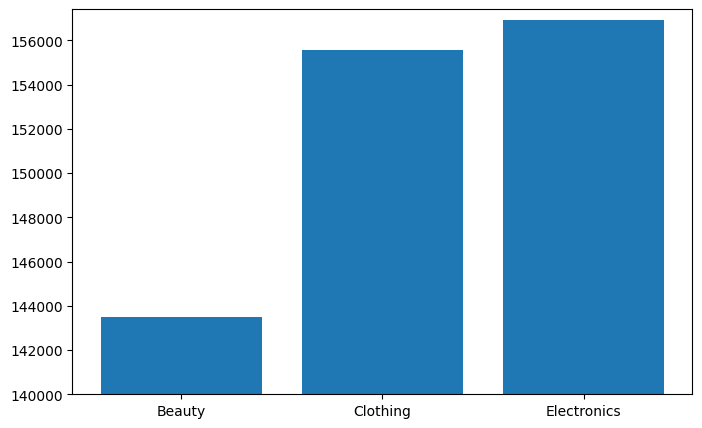

In [20]:
plt.figure(figsize=(8,5))
plt.bar(ds.groupby('Product Category')['Total Amount'].sum().index,ds.groupby('Product Category')['Total Amount'].sum())
plt.ylim(140000, max(ds.groupby('Product Category')['Total Amount'].sum()) + 500)
plt.show()

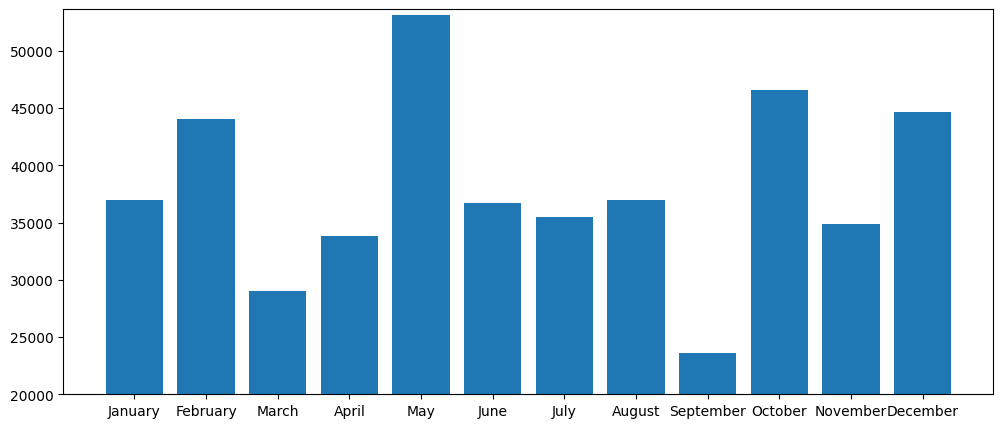

In [25]:
# Define the desired order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert the 'Month' column to categorical data with the specified order
ds['Month'] = pd.Categorical(ds['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(12,5))
plt.bar(ds.groupby('Month', observed=False)['Total Amount'].sum().index, ds.groupby('Month', observed=False)['Total Amount'].sum())
plt.ylim(20000, max(ds.groupby('Month', observed=False)['Total Amount'].sum()) + 500)
plt.show()


(array([0, 1, 2]),
 [Text(0, 0, 'Beauty'), Text(1, 0, 'Clothing'), Text(2, 0, 'Electronics')])

<Figure size 1200x800 with 0 Axes>

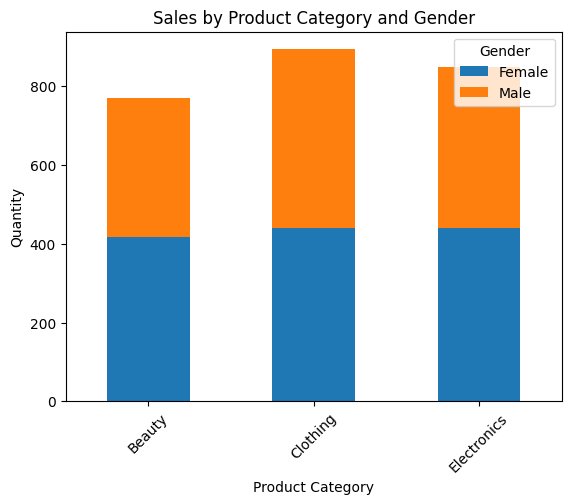

In [39]:
###Product preferences by gender###
category_gender_sales = ds.groupby(['Product Category', 'Gender'])['Quantity'].sum().unstack()

# Plot
plt.figure(figsize=(12, 8))
category_gender_sales.plot(kind='bar', stacked=True)
plt.title('Sales by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.xticks(rotation=45)

<Figure size 1000x600 with 0 Axes>

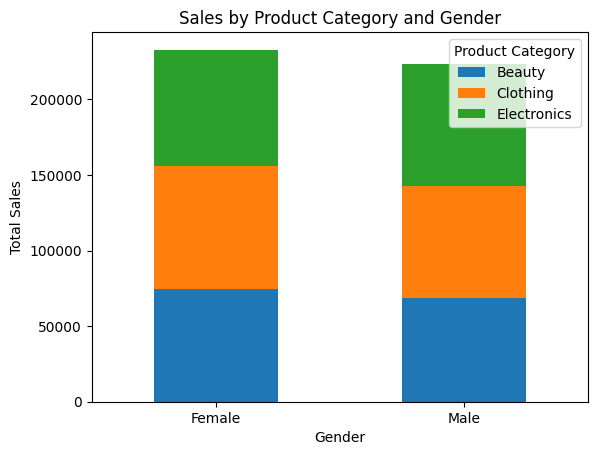

In [33]:
###Product preferences by gender###

# Aggregate sales by gender and product category
gender_category_sales = ds.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()

# Plot
plt.figure(figsize=(10, 6))
gender_category_sales.plot(kind='bar', stacked=True)
plt.title('Sales by Product Category and Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

In [40]:
#The Electronics category contributed most to total sales. Males contributed most to electronics sales.
#Male bought more electronics and clothing while female contributed in buying more beauty products.